In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/NFA_2018.csv', usecols=[0,1,4,5,12])

EFCons = df[df.record == 'EFConsPerCap']
BioCap = df[df.record == 'BiocapPerCap']

years = [1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]

EFCons_years = EFCons[EFCons.year.isin(years)]

BioCap_years = BioCap[BioCap.year.isin(years)]

BioCap_clean = BioCap_years[BioCap_years.country != 'World']

EFCons_clean = EFCons_years[EFCons_years.country != 'World']

## cast as stirng a
EFCons_clean['country'] = EFCons_clean['country'].astype(str)
EFCons_clean['country'] = EFCons_clean['country'].str.strip()

df3 = pd.merge(EFCons_clean, BioCap_clean, on=['country', 'year', 'ISO alpha-3 code'])

df3['biocap_usage'] = df3['total_y'] - df3['total_x']

df3



/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,country,ISO alpha-3 code,year,record_x,total_x,record_y,total_y,biocap_usage
0,Armenia,ARM,1994,EFConsPerCap,1.115877,BiocapPerCap,0.441324,-0.674552
1,Armenia,ARM,1995,EFConsPerCap,1.028198,BiocapPerCap,0.457846,-0.570352
2,Armenia,ARM,1996,EFConsPerCap,1.038000,BiocapPerCap,0.504369,-0.533631
3,Armenia,ARM,1997,EFConsPerCap,1.108374,BiocapPerCap,0.469062,-0.639312
4,Armenia,ARM,1998,EFConsPerCap,1.153641,BiocapPerCap,0.518527,-0.635113
...,...,...,...,...,...,...,...,...
3784,Luxembourg,LUX,1995,EFConsPerCap,13.682908,BiocapPerCap,1.784024,-11.898884
3785,Luxembourg,LUX,1996,EFConsPerCap,14.196521,BiocapPerCap,1.853651,-12.342870
3786,Luxembourg,LUX,1997,EFConsPerCap,15.194159,BiocapPerCap,1.804428,-13.389731
3787,Luxembourg,LUX,1998,EFConsPerCap,13.984384,BiocapPerCap,1.801123,-12.183261


In [2]:
#Gets EF Cons  of specified years
change_years = [1994,2014]

EFCons_change = EFCons_clean[EFCons_clean.year.isin(change_years)]

BioCap_clean = BioCap_years[BioCap_years.country != 'World']

EFCons_clean = EFCons_years[EFCons_years.country != 'World']

df3 = pd.merge(EFCons_clean, BioCap_clean, on=['country', 'year', 'ISO alpha-3 code'])

df3['biocap_usage'] = df3['total_y'] - df3['total_x']

df3



,country,ISO alpha-3 code,year,record_x,total_x,record_y,total_y,biocap_usage
0,Armenia,ARM,1994,EFConsPerCap,1.115877,BiocapPerCap,0.441324,-0.674552
1,Armenia,ARM,1995,EFConsPerCap,1.028198,BiocapPerCap,0.457846,-0.570352
2,Armenia,ARM,1996,EFConsPerCap,1.038000,BiocapPerCap,0.504369,-0.533631
3,Armenia,ARM,1997,EFConsPerCap,1.108374,BiocapPerCap,0.469062,-0.639312
4,Armenia,ARM,1998,EFConsPerCap,1.153641,BiocapPerCap,0.518527,-0.635113
...,...,...,...,...,...,...,...,...
3784,Luxembourg,LUX,1995,EFConsPerCap,13.682908,BiocapPerCap,1.784024,-11.898884
3785,Luxembourg,LUX,1996,EFConsPerCap,14.196521,BiocapPerCap,1.853651,-12.342870
3786,Luxembourg,LUX,1997,EFConsPerCap,15.194159,BiocapPerCap,1.804428,-13.389731
3787,Luxembourg,LUX,1998,EFConsPerCap,13.984384,BiocapPerCap,1.801123,-12.183261


In [3]:
df

df_country = df['country'].drop_duplicates()


print(df_country)

0            Armenia
230      Afghanistan
770          Albania
1310         Algeria
1850          Angola
            ...     
84990     Montenegro
85080          Sudan
85120    South Sudan
85160          China
85700          World
Name: country, Length: 196, dtype: object


In [4]:
change_years = [1994,2014]

EFCons_change = EFCons_clean[EFCons_clean.year.isin(change_years)]

df = EFCons_change[['country','total']]

df

print(type(df))

countries = {}

#calculates average EFConsuption change by subtracting 2014 consumption by 1994 and dividing by 20 years
for index, row in df.iterrows():
    if row['country'] not in countries:
        countries[row['country']]=float(row['total'])
    else:
        countries[row['country']] = abs(float(row['total']) - countries[row['country']])/20
countries
    

#df2 = df.groupby(['country']).diff()/20
#df2

df5 = pd.DataFrame.from_dict(countries, orient='index')
df5.columns = [ 'Rate of Change EF consumption']
df5                  

<class 'pandas.core.frame.DataFrame'>


,Rate of Change EF consumption
Armenia,0.045136
Afghanistan,0.005406
Albania,0.045021
Algeria,0.050041
Angola,0.040262
...,...
Serbia,2.918717
Montenegro,3.416703
Sudan,1.218326
South Sudan,1.542089


In [5]:
import matplotlib.pyplot as plt

df5 = df5.head()
plt.figure()
df5.plot(kind='bar')

In [6]:
import pandas as pd
import numpy as np
## df10 is HDI dataset
df10 = pd.read_csv('data/HDI.csv', usecols=[1,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],)
df10





,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,0.373,0.383,0.398,0.408,0.417,0.429,0.437,0.453,0.463,0.471,0.482,0.487,0.491
1,Albania,0.669,0.676,0.682,0.689,0.694,0.704,0.711,0.720,0.724,0.729,0.741,0.752,0.767,0.771,0.773
2,Algeria,0.644,0.653,0.664,0.674,0.684,0.692,0.698,0.707,0.709,0.719,0.729,0.736,0.740,0.745,0.747
3,Andorra,0.759,0.767,0.780,0.820,0.826,0.819,0.829,0.829,0.831,0.830,0.828,0.827,0.849,0.850,0.853
4,Angola,0.387,0.401,0.418,0.429,0.442,0.455,0.471,0.492,0.502,0.522,0.520,0.535,0.543,0.554,0.564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Venezuela (Bolivarian Republic of),0.672,0.680,0.688,0.687,0.700,0.714,0.727,0.744,0.753,0.753,0.759,0.771,0.774,0.776,0.778
185,Viet Nam,0.579,0.587,0.595,0.603,0.612,0.616,0.624,0.632,0.640,0.656,0.654,0.664,0.670,0.675,0.678
186,Yemen,0.443,0.450,0.456,0.463,0.469,0.474,0.479,0.482,0.485,0.491,0.498,0.499,0.505,0.507,0.505
187,Zambia,0.432,0.440,0.449,0.460,0.469,0.480,0.492,0.503,0.517,0.533,0.544,0.556,0.569,0.574,0.580


In [7]:
cols = ['country', 'year', 'HDI']
lst = []

##  for each row in df10, append a list containing: [country name, year, value for year]
for row in df10.itertuples():
    for i in range(1, 15):
            lst.append([row[1], df10.columns.values[i],row[i+1]])

            
## use list to create a new dataframe            
newDF = pd.DataFrame(lst, columns=cols) 
newDF

## cast year as int to match with other dataframe
newDF['year'] = pd.to_numeric(newDF['year'])


## cast as string and clean up white space
newDF['country'] = newDF.country.astype(str)
newDF['country'] = newDF['country'].str.strip()

newDF.replace('United States', 'United States of America')





 

    
    
# newDF['country'] = pd.to_string(newDF['country'])
# print(newDF.dtypes)
# print(EFCons_clean.dtypes)


# EFCons_clean['year'] = EFCons_clean['year'].astype(np.int64)    
# for col in df1
#     if col == 'HDI Rank (2017)':
#         continue
#     for row in df10.itertuples():
#         lst.append[df[]]
#         df[col][i] = row_value * df1['views'][i]
# for i, row in enumerate(df10.itertuples(), 2):
# #     lst.append([row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12], row[12], row[13], row[14], row[15]])
#     if i <= 15:
#         lst.append([row[1], df10.columns.values[i],row[i]])    
#     print(row.Index)
# for each row r in df1
#     for each column c from index 2 to 16
#         lst.append([r[0], r[1],c.name.toInteger, c.value])
# newDF['country'].dtype
# EFCons_clean['country'].dtype
# newDF['year'].dtype
# EFCons_clean['year'].dtype
# newDF['year'].dtype



             



,country,year,HDI
0,Afghanistan,2000,NaN
1,Afghanistan,2001,NaN
2,Afghanistan,2002,0.373
3,Afghanistan,2003,0.383
4,Afghanistan,2004,0.398
...,...,...,...
2641,Zimbabwe,2009,0.450
2642,Zimbabwe,2010,0.467
2643,Zimbabwe,2011,0.478
2644,Zimbabwe,2012,0.505


In [8]:
## EFCons_clean is the cleaned EF Consumption data set
## newDF is the HDI dataset in the same format as EFCons_clan
hdiDF = pd.merge(EFCons_clean, newDF, how='outer')
# hdiDF = hdiDF.dropna()

# print(EFCons_clean)


# print(newDF)

# hdiDF.iloc[30:100]
# hdiDF
# newDF[list['year', 'country']]
# EFCons_clean.merge(newDF[list('yearcountry')])
# hdiDF
# hdiDF = EFCons_clean.merge(newDF[['year','country']],how='outer')
hdiDF.dropna(how='any', inplace=True)
hdiDF
# print(hdiDF.head(1000))
# print(type(EFCons_clean))
# print('break')
# print(type(newDF))

# print(EFCons_clean)
# print(newDF)

hdiDF.rename(columns={'total': 'EFConsPerCap'}, inplace=True)
hdiDF


,country,ISO alpha-3 code,year,record,EFConsPerCap,HDI
6,Armenia,ARM,2000,EFConsPerCap,1.144260,0.647
7,Armenia,ARM,2001,EFConsPerCap,1.223878,0.652
8,Armenia,ARM,2002,EFConsPerCap,1.235047,0.663
9,Armenia,ARM,2003,EFConsPerCap,1.267316,0.672
10,Armenia,ARM,2004,EFConsPerCap,1.443231,0.680
...,...,...,...,...,...,...
3771,China,CHN,2009,EFConsPerCap,3.230869,0.694
3772,China,CHN,2010,EFConsPerCap,3.404740,0.706
3773,China,CHN,2011,EFConsPerCap,3.585563,0.714
3774,China,CHN,2012,EFConsPerCap,3.634253,0.722


country              Afghanistan
ISO alpha-3 code             AFG
year                        2000
record              EFConsPerCap
EFConsPerCap            0.428228
HDI                        0.252
dtype: object
country                 Zimbabwe
ISO alpha-3 code             ZWE
year                        2013
record              EFConsPerCap
EFConsPerCap             17.0219
HDI                        0.946
dtype: object


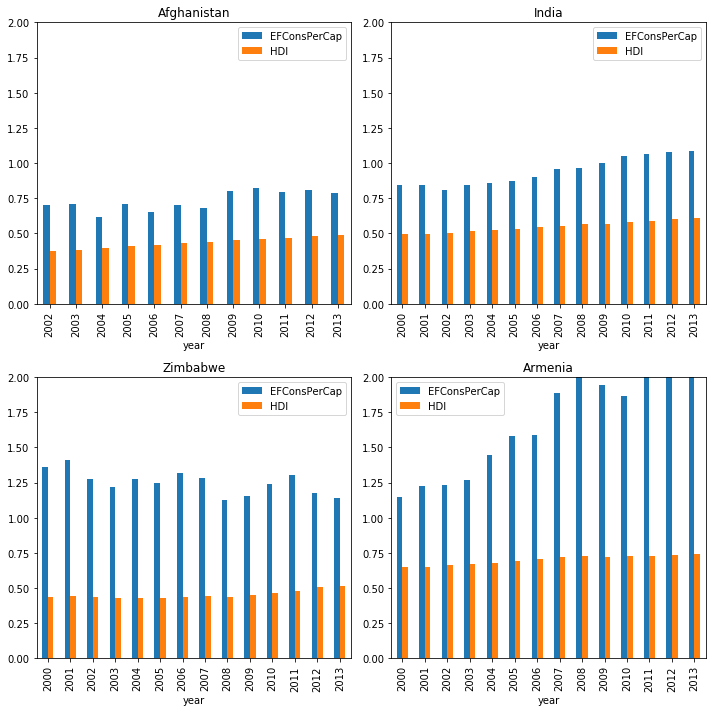

In [9]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
print(hdiDF.min())
print(hdiDF.max())

afg = hdiDF[hdiDF.country == 'Afghanistan']
afg.plot(kind='bar',x='year', y=['EFConsPerCap', 'HDI'], ax=axes[0,0], title='Afghanistan', ylim=(0.0, 2.0))
india = hdiDF[hdiDF.country == 'India']
india.plot(kind='bar',x='year', y=['EFConsPerCap', 'HDI'], ax=axes[0,1], title='India', ylim=(0.0, 2.0))
zim = hdiDF[hdiDF.country == 'Zimbabwe']
zim.plot(kind='bar',x='year', y=['EFConsPerCap', 'HDI'], ax=axes[1,0], title='Zimbabwe', ylim=(0.0, 2.0))
armenia = hdiDF[hdiDF.country == 'Armenia']
armenia.plot(kind='bar',x='year', y=['EFConsPerCap', 'HDI'], ax=axes[1,1], title='Armenia', ylim=(0.0, 2.0))

fig.tight_layout()